Prediction of Forest Cover Type from Cartographic Data
======================================================


Introduction
------------

In this study, we wish to understand what cartographic variables are most predictive of forest cover type. Cartographic variables are stable over time, meaning that they only need to be collected infrequently, and thus are a low-cost way of predicting forest cover type without needing remote sensing data.

Data
----

Data were downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Covertype). 

In [1]:
%matplotlib inline

import pandas as pd

Preprocessing
-------------

As the data in the UCI MLR contains only the values of each row, and no columns, we need to preprocess the data.

The preprocessing is divided into two major steps. Firstly, we read in the data and append the columns accordingly. This is lines 1-28 in the code cell below.

Then, add in the climatic zone and geologic zone codes into the data. This is drived from the information provided in the dataset repository. This is lines 29-36.

Finally, in order to save the cleaned data for convenient use elsewhere, we save the data as a CSV file.

In [2]:
df = pd.read_csv('covtype.data', header=None)

columns = [
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Add in wilderness area data (binary)
for i in range(1, 5):
    columns.append('Wilderness_Area_{0}'.format(i))
    
# Add in soil type data (binary)
for i in range(1, 41):
    columns.append('Soil_Type_{0}'.format(i))

# Add in soil cover type
columns.append('Cover_Type')

df.columns = columns

# Add in soil codes. These were downloaded from the UCI repository.
soil_codes = pd.read_csv('climatic_geologic_zone.csv')
soil_dict = soil_codes.set_index('soil_type').to_dict()

# Add geologic and climatic zone code to soil type
for i in range(1, 41):
    df.loc[df['Soil_Type_{i}'.format(i=i)] == 1, 'Climatic_Zone'] = soil_dict['climatic_zone'][i]
    df.loc[df['Soil_Type_{i}'.format(i=i)] == 1, 'Geologic_Zone'] = soil_dict['geologic_zone'][i]
    
# Encode one-of-K for the geologic and climatic zone encodings.
# This is important because the geologic and climatic zones aren't ordinal - they are strictly categorical.

df.to_csv('covtype_preprocess.csv')

Data Checks
--------

We first checked that the basic parameters of the data are all correct.

In [3]:
df = pd.read_csv('covtype_preprocess.csv', index_col=0)

According to the information given, there should be 581012 rows of data.

In [4]:
df.shape

(581012, 57)

We check that all columns are represented, including the two new columns ('Climatic_Zone' and 'Geologic_Zone').

In [5]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

Just to make sure everything looks right, we will also check a random sample of 20 rows from the data.

In [6]:
df.sample(20)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Climatic_Zone,Geologic_Zone
370496,2711,16,11,309,33,2340,211,217,142,1801,...,0,0,0,0,0,0,0,6,7.0,7.0
407363,3358,142,11,339,158,2810,236,238,131,576,...,0,0,0,0,0,0,0,1,7.0,7.0
436808,3101,317,24,607,304,2497,152,212,197,1413,...,0,0,0,0,0,0,0,1,7.0,7.0
265453,2119,320,24,30,15,949,150,208,195,285,...,0,0,0,0,0,0,0,3,2.0,7.0
443592,2990,318,6,481,69,1708,205,235,169,631,...,0,0,0,0,0,0,0,2,7.0,7.0
282144,3159,20,19,810,-64,832,203,195,124,1782,...,0,0,0,0,0,0,0,1,7.0,7.0
513547,3151,54,24,430,233,1964,226,183,78,2750,...,0,0,0,0,0,0,0,1,7.0,7.0
147454,2972,138,7,150,27,3948,232,238,138,1980,...,0,0,0,0,0,0,0,2,7.0,7.0
101587,2678,335,22,60,21,2014,165,204,175,2694,...,0,0,0,0,0,0,0,2,7.0,7.0
139942,2841,142,13,175,57,2268,238,237,126,1566,...,0,0,0,0,0,0,0,2,7.0,7.0


Finally, we want to know whether there are `NaN` values present or not. If there are, we need to drop those.

In [7]:
# This line came from StackOverflow: http://stackoverflow.com/questions/14016247/python-find-integer-index-of-rows-with-nan-in-pandas
pd.isnull(df).any(1).nonzero()[0]

array([], dtype=int64)

There are no `NaN`s, which is a good thing!

Exploratory Data Analysis
--------

Before throwing a machine learning model at the problem, we would like to visually check first to see whether there's a relationship between the output variable (cover type) and the explanatory variables (all other columns).

For the quantitative variables, we will use violin plots to visualize their distributions to see which ones are most discriminant amongst the 7 cover type classes.

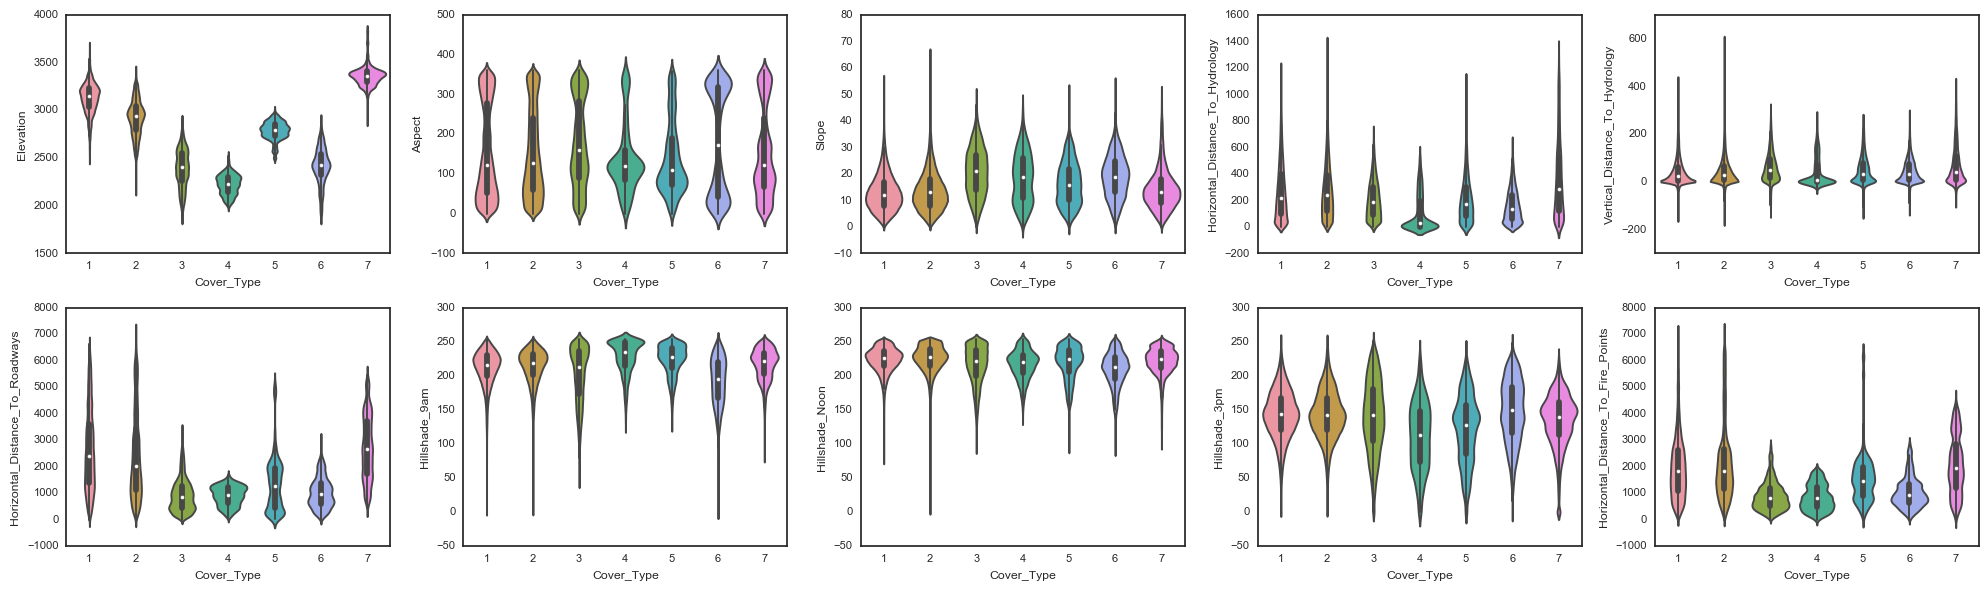

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('white')
sns.set_context('paper')

# Some helper variables just in case.
quant_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
              'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
              'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

input_cols = [c for c in df.columns if c != 'Cover_Type']
output_cols = ['Cover_Type']


# We have 10 quantitative variables, therefore do a 2 row, 5 col plot.
n_rows = 2
n_cols = 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6))

i = 0
for axrows in axes:
    for ax in axrows:
        sns.violinplot(data=df, x='Cover_Type', y=quant_cols[i], ax=ax)
        i += 1
plt.tight_layout()

From the distributions of data, it looks like on its own, only elevation has some measure of discriminatory power to be able to distinguish between the cover types. As for the others, they may have better discriminatory power if used in conjunction with one another, but won't be able to stand alone. For example, under **Elevation**, there are 5 cover types that have a clearly bimodal distribution, with the two modes at different locations, but they overlap quite a bit. As another example, under **Horizontal Distance to Roadways**, there are four cover types with low median distance and three with a higher horizontal distance, and that information may be useful in conjunction with other features.

For the categorical variables, we will compute and plot a metric of correlation, the mutual information score.

In [14]:
# Categorical cols are columns that are present in the input cols but not present in the quantitative cols
categorical_cols = sorted(list(set(input_cols).difference(quant_cols)))

# Compute each categorical column's mutual information score with Cover_Type
from sklearn.metrics import normalized_mutual_info_score as nmi
import numpy as np

nmis = []
for col in categorical_cols:
    nmis.append(nmi(df['Cover_Type'], df[col]))

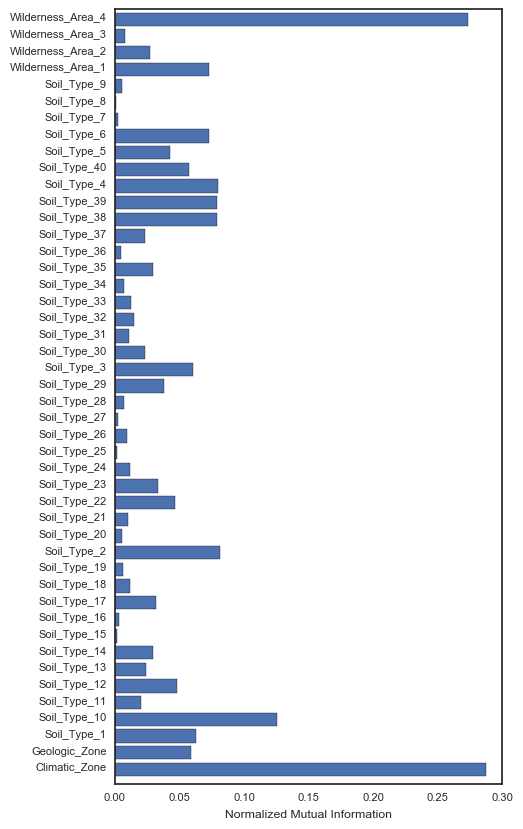

In [15]:
# Plot the normalized mutual information.

nmi_df = pd.DataFrame()
nmi_df['features'] = categorical_cols
nmi_df['normalized mutual information'] = nmis

pos = np.arange(len(categorical_cols)) + 0.5
plt.figure(figsize=(5, 10))
plt.barh(range(len(nmis)), nmis)
plt.yticks(pos, categorical_cols)
plt.ylim(-0.5, max(pos) + 0.5)
plt.xlabel('Normalized Mutual Information')
plt.show()

Looking at this information, it looks like the best way forward is to use an ensemble classifier rather than a linear classifier. Each individual categorical and quantitative feature might not be predictive enough, but in aggregate, they might be.

With half a million data points, we will randomly subsample only a fraction of the data (10%) for model training. Up front, the model selection strategy will go in the following stages. First, we will pick the best "vanilla" ensemble classifier (i.e. without tweaking). Each vanilla model will be tested on 5-fold cross validation on the same subset of data. Then we will tweak the best model's parameters.

In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.metrics import f1_score

# Sample 10% of the data.
df_samp = df.sample(frac=0.1)

# X_train, X_test, Y_train, Y_test = train_test_split(df[input_cols], df[output_cols], test_size=0.2)
X_train, X_test, Y_train, Y_test = train_test_split(df_samp[input_cols], df_samp[output_cols], test_size=0.2)

# Create a CV iterator.
cv = ShuffleSplit(n_splits=4)

In [21]:
classifiers = {'rfc': RandomForestClassifier(), 
               'abc': AdaBoostClassifier(), 
               'bgc': BaggingClassifier(), 
               'etc': ExtraTreesClassifier()
              }

In [46]:
scores = dict()

scores['rfc'] = cross_val_score(classifiers['rfc'], df_samp[input_cols], df_samp[output_cols].values.ravel(), cv=cv, n_jobs=-1, scoring='f1_weighted')
scores['abc'] = cross_val_score(classifiers['abc'], df_samp[input_cols], df_samp[output_cols].values.ravel(), cv=cv, n_jobs=-1, scoring='f1_weighted')
scores['bgc'] = cross_val_score(classifiers['bgc'], df_samp[input_cols], df_samp[output_cols].values.ravel(), cv=cv, n_jobs=-1, scoring='f1_weighted')
scores['etc'] = cross_val_score(classifiers['etc'], df_samp[input_cols], df_samp[output_cols].values.ravel(), cv=cv, n_jobs=-1, scoring='f1_weighted')

# clf = RandomForestClassifier()
# clf.fit(X_train, Y_train.values.ravel())

/Users/ericmjl/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ericmjl/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ericmjl/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ericmjl/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ericmjl/anaconda/

In [47]:
scores

{'abc': array([ 0.60549165,  0.39499284,  0.53494709,  0.58525093]),
 'bgc': array([ 0.88489851,  0.88474601,  0.88417308,  0.88285229]),
 'etc': array([ 0.84848254,  0.8660131 ,  0.85795104,  0.86945072]),
 'rfc': array([ 0.85308568,  0.86662856,  0.85723596,  0.862781  ])}

In [48]:
def summary_stats(dictionary):
    summary_stats = []
    for k, v in dictionary.items():
        newdict = dict()
        newdict['classifier'] = k
        newdict['mean'] = np.mean(v)
        newdict['std']= np.std(v)
        summary_stats.append(newdict)
    return summary_stats

summary_stats(scores)

[{'classifier': 'etc',
  'mean': 0.86047435058179278,
  'std': 0.0080842973328490841},
 {'classifier': 'abc',
  'mean': 0.53017062819013816,
  'std': 0.082162867185724228},
 {'classifier': 'rfc',
  'mean': 0.85993279822054902,
  'std': 0.0051744910572055517},
 {'classifier': 'bgc',
  'mean': 0.88416747284111152,
  'std': 0.00080604593010449009}]

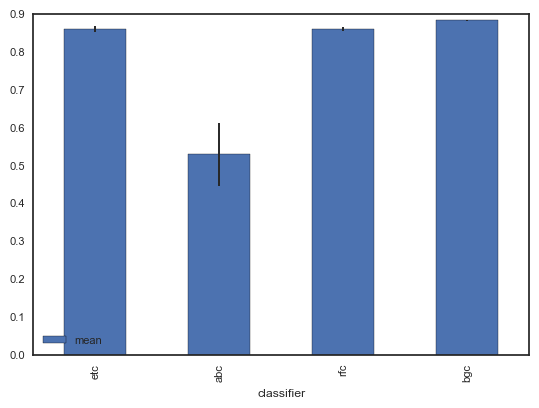

In [51]:
vanilla_means = pd.DataFrame(summary_stats(scores))
vanilla_means.plot(kind='bar', x='classifier', y='mean', yerr='std')

Looking at the scores, a plain vanilla Random Forest (personal favourite) performed a close second-best to the Bagging Classifier. However, even though this is true, Random Forest affords some measure of interpretability through the `feature_importances_` attribute, which the Bagging Classifier doesn't have.

In [79]:
n_est = [30, 40, 50, 60, 70, 80, 90, 100, 300]
scores = []
for n in n_est:
    print(n)
    cv_scores = cross_val_score(clf, df_samp[input_cols], df_samp[output_cols].values.ravel(), cv=cv, scoring='f1_weighted', n_jobs=-1)
    scores.append(cv_scores)
scores

30
40
50
60
70
80
90
100
300


[array([ 0.87802982,  0.88420673,  0.87693859,  0.88686165]),
 array([ 0.88098146,  0.87583239,  0.88439891,  0.87828813]),
 array([ 0.88848956,  0.87673959,  0.8807521 ,  0.88814661]),
 array([ 0.88125902,  0.88269554,  0.88855651,  0.89265934]),
 array([ 0.87815684,  0.88662625,  0.87652133,  0.88233129]),
 array([ 0.88267247,  0.87997083,  0.88897239,  0.8767323 ]),
 array([ 0.88469768,  0.88050004,  0.88784344,  0.88609349]),
 array([ 0.88150069,  0.8784239 ,  0.87954777,  0.88237775]),
 array([ 0.87815722,  0.88622527,  0.88462998,  0.88544707])]

(20, 110)

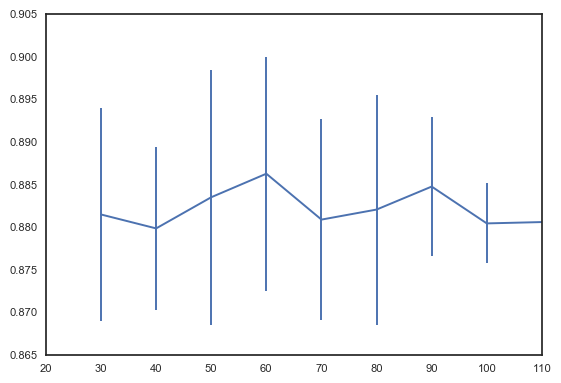

In [81]:
# plt.scatter(n_est, np.array(scores).mean(axis=1))
plt.errorbar(n_est, np.array(scores).mean(axis=1), yerr=np.array(scores).std(axis=1)*3)
plt.xlim(20, 110)

Looking at the performance metrics, it looks like the base estimator with 30 trees is good enough. It's also pretty darn fast. Let's continue with that and explore whether the confusion matrix shows good performance. Also, let's now switch to the full dataset.

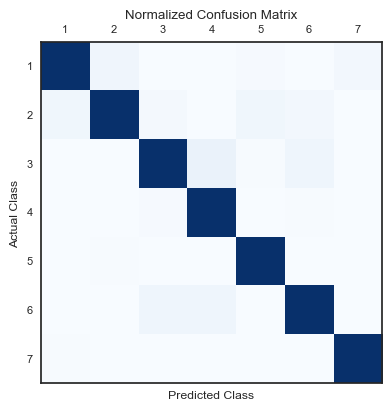

In [164]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Train test split on the full dataset.
X_train, X_test, Y_train, Y_test = train_test_split(df[input_cols], df[output_cols], test_size=0.2)

clf = RandomForestClassifier(n_estimators=30)
clf.fit(X_train, Y_train.values.ravel())
preds = clf.predict(X_test)
# score = f1_score(Y_test, preds, average='weighted')

# Compute the confusion matrix and normalize it to the max of each row.
confusion_mat = confusion_matrix(Y_test, preds)
confusion_mat = confusion_mat / confusion_mat.max(axis=1)

fig1 = plt.figure(1)
plt.matshow(confusion_mat, cmap=plt.cm.Blues)
ax = plt.gca()
ax.set_xticklabels(range(0, 8))
ax.set_yticklabels(range(0, 8))
ax.set_xlabel('Predicted Class')
ax.set_ylabel('Actual Class')
plt.title('Normalized Confusion Matrix')

In [165]:
score = f1_score(Y_test, preds, average='weighted')
score

from sklearn.metrics import classification_report

print(classification_report(Y_test, preds))

             precision    recall  f1-score   support

          1       0.96      0.94      0.95     42488
          2       0.95      0.97      0.96     56513
          3       0.93      0.96      0.95      7186
          4       0.90      0.84      0.87       548
          5       0.95      0.76      0.84      1949
          6       0.93      0.87      0.90      3439
          7       0.97      0.94      0.96      4080

avg / total       0.95      0.95      0.95    116203



Normalized confusion matrix: Each row is normalized to the maximal value.

Based on the confusion matrix and the F1 score, it looks like the performance of the classifier is reasonably good.

Some difficulties remain. For example, it is most difficult to accurately identify Cover_Type class 4 (Cottonwood/Willow) and 6 (Douglas-fir).

Feature Importances
------------

What are the most important features for determining the forest cover type? Let us look for the features that cumulatively sum up to 95% of the total feature importances.

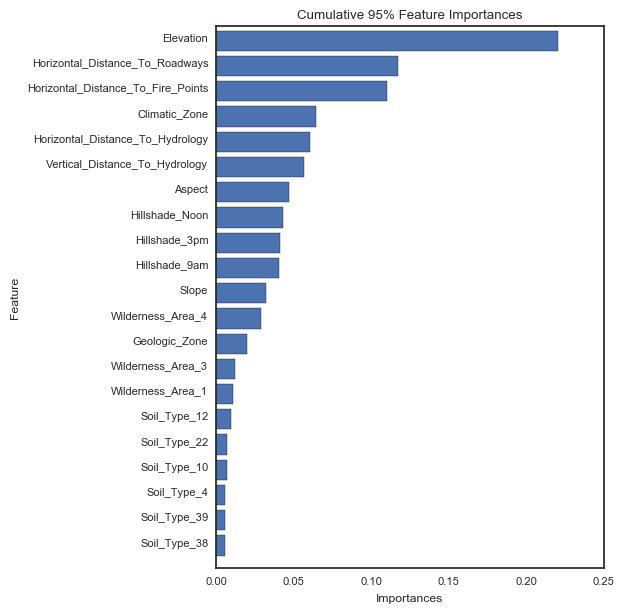

In [166]:
feat_impts = pd.DataFrame()
feat_impts['Features'] = X_test.columns
feat_impts['Importances'] = clf.feature_importances_
feat_impts.sort_values(by='Importances', ascending=False, inplace=True)
feat_impts['Cumulative Importance'] = feat_impts['Importances'].cumsum()
feat_impts = feat_impts[feat_impts['Cumulative Importance'] < 0.95].sort_values(by='Importances', ascending=True)

# Plot the feature importances.
pos = np.arange(len(feat_impts)) + 0.5
plt.figure(figsize=(5, 7))
plt.barh(range(len(feat_impts)), feat_impts['Importances'])
plt.yticks(pos, feat_impts['Features'])
plt.ylim(-0.5, max(pos) + 0.5)
plt.xlabel('Importances')
plt.ylabel('Feature')
plt.title('Cumulative 95% Feature Importances')
plt.show()

Cumulatively, the features shown above account for 95% of all of the feature importances learned by the Random Forest classifier.

Conclusion
-----

Using ensemble learners, it is possible to predict, with little data normalization required, the forest cover class.